# PREPARACIÓN EDA

 1. Eliminar las columnas innecesarias.
 2. Escoger las partidas aduaneras relevantes para el estudio.
 3. La columna fecha debe dividirse en año y mes.

In [117]:
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas_profiling as ppr 
from fitter import Fitter 

In [118]:
%matplotlib inline

In [119]:
df_imp = pd.read_excel('Imp_m&m.xlsx')

In [120]:
# Composición inicial de la matriz
df_imp.shape

(367, 56)

In [121]:
# Eliminamos las columnas innecesarias para el estudio.
df_columnas_eliminadas =(df_imp.drop(['DUA','Aduana', 'ETA', 'Manifiesto Nr.', 'Embarcador / Exportador', 'Qty 1', 'Und 1', 'Qty 2', 'Und 2', 'U$ Flete Tot', 'U$ CFR Tot', 'U$ Seguro Tot', 'Fecha Embarque', 'U$ CIF Tot', 'U$ FOB Und 1', 'U$ CFR Und 1', 'AntiDumping', 'U$ CIF Und 1', 'U$ (CIF + Imp) Und 1', 'Cod. Tributario','U$ FOB Und 2','U$ CFR Und 2','Pais de Compra', 'Estado', 'Banco', 'Descripcion5', 'ISC', 'Descripcion1', 'Descripcion2', 'Descripcion4', 'Descripcion3', 'Agente Carga(Destino)', 'Agente Carga(Origen)', 'Naviera', 'Agencia de transporte', 'Derechos Espec.', 'Puerto de Embarque','U$ CIF Und 2', 'U$ (CIF + Imp) Und 2', 'Sobretasa',], axis=1))

In [122]:
# Conteo de cuantas veces se duplican las partidas aduaneras
filtro_duplicados = df_columnas_eliminadas['Partida Aduanera'].duplicated(keep=False)
df_columnas_eliminadas[filtro_duplicados]['Partida Aduanera'].value_counts()

1806900000    202
2105009000     31
6302320000     24
3304990000     24
9404900000     12
6302220000      9
3303000000      7
6403999000      7
1704909000      7
8481808000      6
8512201000      4
9018320000      4
1806320000      3
3305900000      3
1806310000      3
8481809900      3
6210100000      2
7318160000      2
7318230000      2
8481200090      2
Name: Partida Aduanera, dtype: int64

In [123]:
# Se trabajará con 3 partidas aduaneras
filtro_partidas_aduaneras = df_columnas_eliminadas['Partida Aduanera'].isin ([1806900000,1704909000,1806320000])
df_filtro_partidas = df_columnas_eliminadas[filtro_partidas_aduaneras]

In [124]:
df_filtro_partidas.shape

(212, 16)

In [125]:
# Creamos dos columnas apartir de la columna fecha
df_filtro_partidas['Año'] = df_filtro_partidas['Fecha'].dt.year
df_filtro_partidas['Mes'] = df_filtro_partidas['Fecha'].dt.month
df_filtro_partidas.head(2)

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_12436\2896297132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_partidas['Año'] = df_filtro_partidas['Fecha'].dt.year
C:\Users\Beatriz\AppData\Local\Temp\ipykernel_12436\2896297132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_partidas['Mes'] = df_filtro_partidas['Fecha'].dt.month


,Partida Aduanera,Descripcion de la Partida Aduanera,Fecha,Importador,Kg Bruto,Kg Neto,U$ FOB Tot,Pais de Origen,Via,Agente de Aduana,Almacen,Descripcion Comercial,Ad Valorem,IGV,IPM,Canal,Año,Mes
0,1704909000,CHOCOLATE BLANCO Y DEMAS ARTICULOS DE CONFITER...,2021-03-31,ROYAL BRANDING PERU S.A.C.,302.62,291.82,375.0,ESTADOS UNIDOS,MARÍTIMO,CMC LOGISTIC´S S.A.C.,VILLAS OQUENDO S.A.,"M&M CHOCOLATE,M&M´S,S/M, REGISTRO SANITARIO:G6...",24.43,69.04,8.63,VERDE,2021,3
1,1704909000,CHOCOLATE BLANCO Y DEMAS ARTICULOS DE CONFITER...,2021-04-06,ROYAL BRANDING PERU S.A.C.,623.59,610.17,900.0,ESTADOS UNIDOS,MARÍTIMO,CMC LOGISTIC´S S.A.C.,NEPTUNIA S.A.,"M&M CHOCOLATE SINGLES,M&M´S,S/M, REGISTRO SANI...",0.00,163.28,20.41,VERDE,2021,4


In [126]:
# Eliminamos la columna fecha y nos quedamos con esta última matriz.
df_final = (df_filtro_partidas.drop(['Fecha'], axis=1))
df_final.shape

(212, 17)

In [127]:
df_suma_imp = df_final.pivot_table(index="Importador" , values="U$ FOB Tot", aggfunc='sum')

In [128]:
df_suma_imp.sort_values('U$ FOB Tot',ascending = False)

,U$ FOB Tot
Importador,
PERUFARMA,1658216.09
AXIONLOG PERU S.A.C.,284844.25
MASEF IMPORT S.A.C.,56731.44
TOP PARTNER S.A.C.,23129.00
ROYAL BRANDING PERU S.A.C.,7875.00
KIMBAFA IMPORT EXPORT E.I.R.L.,7193.53
MIKA INVERSIONES S.A.C.,6803.72
DISTRIBUIDORA ODET S.A.C.,1200.00


In [129]:
df_importador = df_final.groupby('Importador').agg({'U$ FOB Tot':'sum'})

In [130]:
df_imp_fob = df_importador.sort_values('U$ FOB Tot',ascending = False)
print(df_imp_fob)

                                                    U$ FOB Tot
Importador                                                    
PERUFARMA                                           1658216.09
AXIONLOG PERU S.A.C.                                 284844.25
MASEF IMPORT S.A.C.                                   56731.44
TOP PARTNER S.A.C.                                    23129.00
ROYAL BRANDING PERU S.A.C.                             7875.00
KIMBAFA IMPORT EXPORT E.I.R.L.                         7193.53
MIKA INVERSIONES S.A.C.                        ...     6803.72
DISTRIBUIDORA ODET S.A.C.                              1200.00


In [131]:
df_imp_fob = df_imp_fob.rename(index={0: "PERUFARMA S A"})

<AxesSubplot:title={'center':'Importacion por FOB'}, ylabel='Importador'>

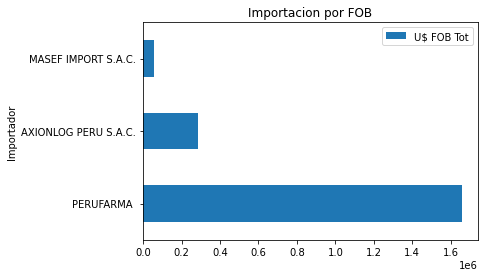

In [132]:
df_imp_fob.head(3).plot(kind='barh', title = 'Importacion por FOB')

In [133]:
df_suma_mes = df_final.pivot_table(index="Mes" , values="U$ FOB Tot", aggfunc='sum')
print(df_suma_mes)

     U$ FOB Tot
Mes            
1     160574.24
2     263536.28
3      25220.54
4     178798.67
5     104291.52
6      70635.64
7     168934.47
8     176873.42
9     466407.63
10     65271.50
11    333166.34
12     32282.78


<AxesSubplot:title={'center':'FOB por Mes'}, xlabel='Mes'>

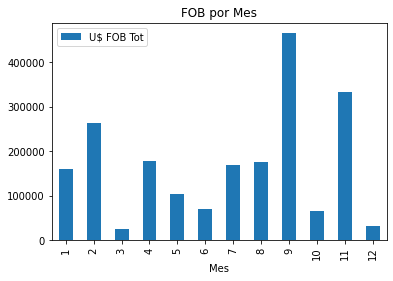

In [134]:
df_suma_mes.plot(kind='bar', title = 'FOB por Mes')